In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [2]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [4]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [7]:
y_train.shape

(33600, 10)

In [19]:
def evaluation(model,X,y):
    eva = model.evaluate(X,y)
    print('loss :: ',np.round(eva[0],5))
    print('accuracy :: ',np.round(eva[1]*100,2))

# Without Batch Normalization

In [14]:
classifier_wbn = Sequential() 

In [15]:
classifier_wbn.add(Dense(16,activation='relu'))
classifier_wbn.add(Dense(16,activation='relu'))
classifier_wbn.add(Dense(10,activation='sigmoid'))

In [16]:
classifier_wbn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
eps = 100
model_wbn = classifier_wbn.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.8059 - accuracy: 0.2894 - val_loss: 1.6240 - val_accuracy: 0.3987
Epoch 2/100
840/840 [==============================] - 1s 1ms/step - loss: 1.4048 - accuracy: 0.4799 - val_loss: 1.2245 - val_accuracy: 0.5185
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1716 - accuracy: 0.5492 - val_loss: 1.0841 - val_accuracy: 0.5932
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.0291 - accuracy: 0.6033 - val_loss: 0.9991 - val_accuracy: 0.6329
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9275 - accuracy: 0.6476 - val_loss: 0.9278 - val_accuracy: 0.6414
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.8477 - accuracy: 0.6848 - val_loss: 0.8117 - val_accuracy: 0.7037
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7872 - accuracy: 0.7264 - val_loss: 0.8141 - val_accuracy: 0.7201

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.9052 - val_loss: 0.4366 - val_accuracy: 0.8817
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.9049 - val_loss: 0.4209 - val_accuracy: 0.8865
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3238 - accuracy: 0.9047 - val_loss: 0.4234 - val_accuracy: 0.8821
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.9051 - val_loss: 0.4341 - val_accuracy: 0.8814
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.9070 - val_loss: 0.4482 - val_accuracy: 0.8790
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.9078 - val_loss: 0.4553 - val_accuracy: 0.8792
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.9058 - val_loss: 0.4274 - val_accuracy:

In [20]:
evaluation(classifier_wbn,X_test,y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8949
loss ::  0.42859
accuracy ::  89.49


# With Batch Normalization

In [21]:
classifier_bn = Sequential() 

In [22]:
classifier_bn.add(Dense(16,activation='relu'))
classifier_bn.add(BatchNormalization())
classifier_bn.add(Dense(16,activation='relu'))
classifier_bn.add(BatchNormalization())
classifier_bn.add(Dense(10,activation='sigmoid'))

In [23]:
classifier_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
eps = 100
model_bn = classifier_bn.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 0.6867 - accuracy: 0.8054 - val_loss: 0.3038 - val_accuracy: 0.9131
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3196 - accuracy: 0.9065 - val_loss: 0.2508 - val_accuracy: 0.9256
Epoch 3/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2679 - accuracy: 0.9196 - val_loss: 0.2208 - val_accuracy: 0.9338
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2393 - accuracy: 0.9286 - val_loss: 0.2283 - val_accuracy: 0.9330
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2220 - accuracy: 0.9327 - val_loss: 0.2165 - val_accuracy: 0.9362
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2126 - accuracy: 0.9355 - val_loss: 0.1950 - val_accuracy: 0.9433
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1986 - accuracy: 0.9398 - val_loss: 0.2092 - val_accuracy: 0.9366

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0909 - accuracy: 0.9688 - val_loss: 0.2184 - val_accuracy: 0.9452
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0904 - accuracy: 0.9696 - val_loss: 0.2200 - val_accuracy: 0.9439
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0911 - accuracy: 0.9698 - val_loss: 0.2197 - val_accuracy: 0.9445
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0876 - accuracy: 0.9715 - val_loss: 0.2179 - val_accuracy: 0.9460
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0884 - accuracy: 0.9703 - val_loss: 0.2313 - val_accuracy: 0.9414
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0878 - accuracy: 0.9705 - val_loss: 0.2241 - val_accuracy: 0.9432
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0861 - accuracy: 0.9717 - val_loss: 0.2376 - val_accuracy:

In [25]:
evaluation(classifier_bn,X_test,y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.9399
loss ::  0.26778
accuracy ::  93.99


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


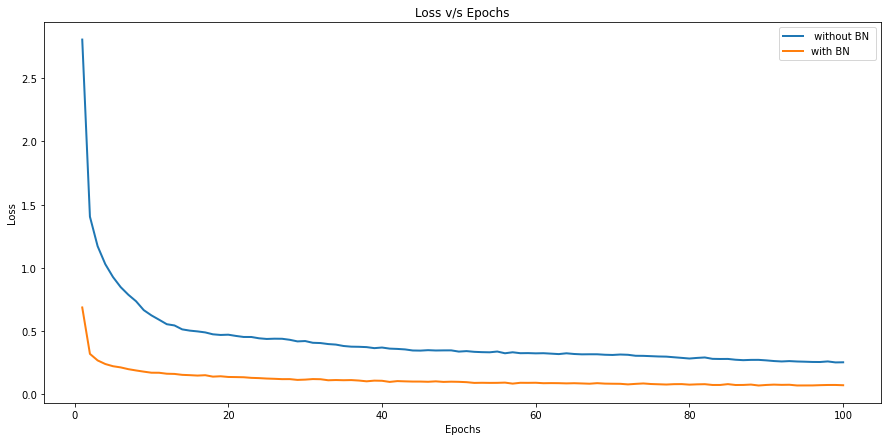

In [26]:
plt.figure(figsize=(15,7))
epochs = range(1,101)
train_loss_wbn = model_wbn.history['loss']
train_loss_bn = model_bn.history['loss']
sns.lineplot(epochs, train_loss_wbn, label =' without BN ',linewidth = 2)
sns.lineplot(epochs, train_loss_bn, label ='with BN', linewidth=2)
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


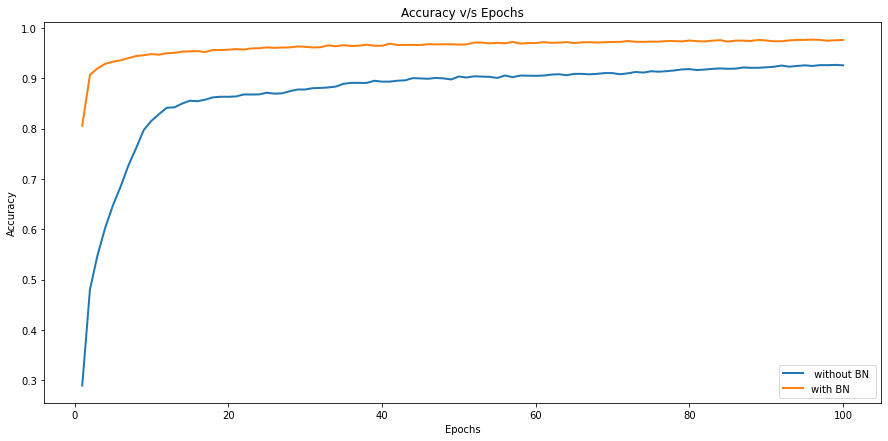

In [27]:
plt.figure(figsize=(15,7))
epochs = range(1,101)
train_acc_wbn = model_wbn.history['accuracy']
train_acc_bn = model_bn.history['accuracy']
sns.lineplot(epochs, train_acc_wbn, label =' without BN ',linewidth = 2)
sns.lineplot(epochs, train_acc_bn, label ='with BN', linewidth=2)
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()